# Gamma distribution

https://en.wikipedia.org/wiki/Gamma_distribution

[*********************100%***********************]  1 of 1 completed


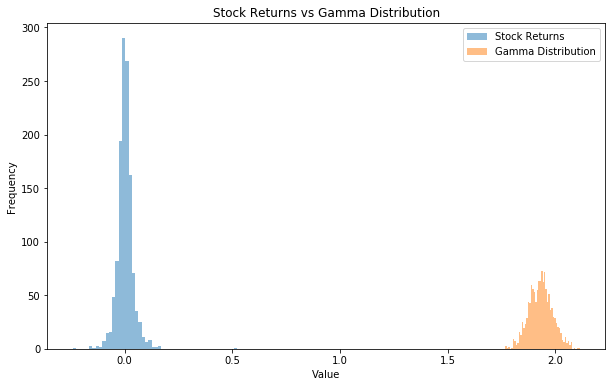

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# Prepare data
data = dataset['Adj Close']

def gamma_distribution(shape, scale, size=1000):
    return np.random.gamma(shape, scale, size)
  
# Calculate daily returns
returns = data.pct_change().dropna()

# Fit Gamma distribution to returns
shape, scale = np.shape(returns), np.std(returns)**2

# Generate Gamma distribution using the parameters from the stock returns
gamma_data = gamma_distribution(shape, scale, size=len(returns))

# Plot histogram of stock returns and Gamma distribution
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.5, label='Stock Returns')
plt.hist(gamma_data, bins=50, alpha=0.5, label='Gamma Distribution')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Stock Returns vs Gamma Distribution')
plt.show()

[*********************100%***********************]  1 of 1 completed


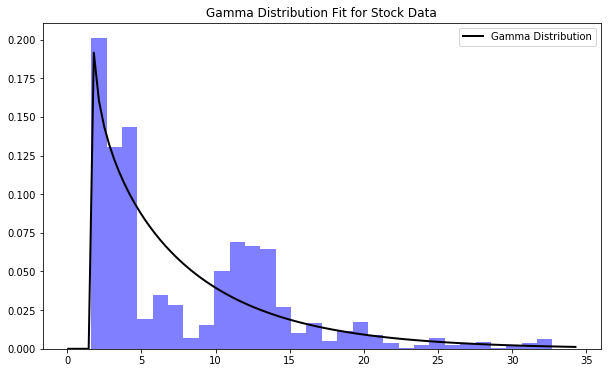

In [2]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# Prepare data
data = dataset['Adj Close']


def gamma_distribution_fit(data):
    shape, loc, scale = stats.gamma.fit(data)
    return shape, loc, scale  
  
# Fit Gamma Distribution
shape, loc, scale = gamma_distribution_fit(data.dropna())

# Generate random numbers from the fitted distribution
random_numbers = np.random.gamma(shape, scale, len(data.dropna()))

# Plot the data and the fitted Gamma Distribution
plt.figure(figsize=(10, 6))

# Histogram of the data
plt.hist(data.dropna(), bins=30, density=True, alpha=0.5, color='blue')

# Plot the fitted Gamma Distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'k-', linewidth=2, label='Gamma Distribution')

plt.title('Gamma Distribution Fit for Stock Data')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


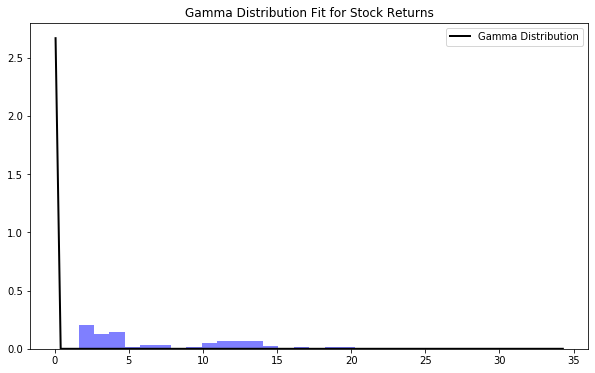

In [3]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# Prepare data
data = dataset['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

def gamma_distribution_fit(returns):
    shape, loc, scale = stats.gamma.fit(returns)
    return shape, loc, scale  
  
# Fit Gamma Distribution
shape, loc, scale = gamma_distribution_fit(returns.dropna())

# Generate random numbers from the fitted distribution
random_numbers = np.random.gamma(shape, scale, len(data.dropna()))

# Plot the data and the fitted Gamma Distribution
plt.figure(figsize=(10, 6))

# Histogram of the data
plt.hist(data.dropna(), bins=30, density=True, alpha=0.5, color='blue')

# Plot the fitted Gamma Distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'k-', linewidth=2, label='Gamma Distribution')

plt.title('Gamma Distribution Fit for Stock Returns')
plt.legend()
plt.show()